In [1]:
#Importing libraries
import numpy as np
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
#loading the dataset
df = pd.read_csv("tweets_data.csv")
df.head()

,Sr no,id,label,tweet
0,0,1,0,@user when a father is dysfunctional and is s...
1,1,2,0,@user @user thanks for #lyft credit i can't us...
2,2,3,0,bihday your majesty
3,3,4,0,#model i love u take with u all the time in ...
4,4,5,0,factsguide: society now #motivation


In [4]:
df.isnull().sum()

Sr no    0
id       0
label    0
tweet    0
dtype: int64

In [5]:
del df['Sr no']
del df['id']
df.head()

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [6]:
df['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

In [7]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [8]:
#Printing stopwords in english
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [9]:
df.shape

(31962, 2)

In [10]:
#Lowering Case
def to_lower(word): 
     result = word.lower() 
     return result 

In [11]:
df['tweet'] = df['tweet'].apply(to_lower)

In [12]:
df['tweet']

0         @user when a father is dysfunctional and is s...
1        @user @user thanks for #lyft credit i can't us...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate @user isz that youuu?ðððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960    @user #sikh #temple vandalised in in #calgary,...
31961                     thank you @user for you follow  
Name: tweet, Length: 31962, dtype: object

In [13]:
#Removing of mentions
def remove_mentions(word):       
    result = re.sub(r"@\S+", "", word)       
    return result
df['tweet'] = df['tweet'].apply(remove_mentions)
df['tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for #lyft credit i can't use cause th...
2                                      bihday your majesty
3        #model   i love u take with u all the time in ...
4                   factsguide: society now    #motivation
                               ...                        
31957    ate  isz that youuu?ððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     #sikh #temple vandalised in in #calgary, #wso...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

In [15]:
#Removing special characters
import string
def remove_special_characters(word):       
    result = word.translate(str.maketrans(dict.fromkeys(string.punctuation)))    
    return result
df['tweet'] = df['tweet'].apply(remove_special_characters)
df['tweet']

0          when a father is dysfunctional and is so sel...
1          thanks for lyft credit i cant use cause they...
2                                      bihday your majesty
3        model   i love u take with u all the time in u...
4                     factsguide society now    motivation
                               ...                        
31957    ate  isz that youuuððððððð...
31958      to see nina turner on the airwaves trying to...
31959    listening to sad songs on a monday morning otw...
31960     sikh temple vandalised in in calgary wso cond...
31961                          thank you  for you follow  
Name: tweet, Length: 31962, dtype: object

In [18]:
#Removing stop words
def remove_stop_words(words):       
    result = [i for i in words if i not in stopwords.words("english")] 
    result = ''.join(result)
    return result
df['tweet'] = df['tweet'].apply(remove_stop_words)
df['tweet']

0          when  fher  funcnl n   elfh he rg h k n h fu...
1          hnk fr lf cre  cn ue cue he n ffer wheelchr ...
2                                                 bh ur je
3        el    lve u ke wh u ll he e n urð± ððð...
4                                        fcgue ce nw    vn
                               ...                        
31957    e  z h uuuððððððððð...
31958       ee nn urner n he rwve rng  wrp herelf n he ...
31959                      lenng   ng n  n rnng w  wrk    
31960                    kh eple vnle n n clgr w cnen  c  
31961                                   hnk u  fr u fllw  
Name: tweet, Length: 31962, dtype: object

In [19]:
#Removing hyperlinks
def remove_hyperlink(word):       
    return re.sub(r"http\S+", "", word)
df['tweet'] = df['tweet'].apply(remove_hyperlink)
df['tweet']

0          when  fher  funcnl n   elfh he rg h k n h fu...
1          hnk fr lf cre  cn ue cue he n ffer wheelchr ...
2                                                 bh ur je
3        el    lve u ke wh u ll he e n urð± ððð...
4                                        fcgue ce nw    vn
                               ...                        
31957    e  z h uuuððððððððð...
31958       ee nn urner n he rwve rng  wrp herelf n he ...
31959                      lenng   ng n  n rnng w  wrk    
31960                    kh eple vnle n n clgr w cnen  c  
31961                                   hnk u  fr u fllw  
Name: tweet, Length: 31962, dtype: object

In [21]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')
df['tweet'] = df['tweet'].apply(word_tokenize)
df['tweet']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


0        [when, fher, funcnl, n, elfh, he, rg, h, k, n,...
1        [hnk, fr, lf, cre, cn, ue, cue, he, n, ffer, w...
2                                             [bh, ur, je]
3        [el, lve, u, ke, wh, u, ll, he, e, n, urð±, ...
4                                      [fcgue, ce, nw, vn]
                               ...                        
31957    [e, z, h, uuuððððððððð...
31958    [ee, nn, urner, n, he, rwve, rng, wrp, herelf,...
31959                      [lenng, ng, n, n, rnng, w, wrk]
31960             [kh, eple, vnle, n, n, clgr, w, cnen, c]
31961                                [hnk, u, fr, u, fllw]
Name: tweet, Length: 31962, dtype: object

In [22]:
#Stemming
stemmer = PorterStemmer()
def stem_words(text):       
    return " ".join([stemmer.stem(word) for word in text])
df['tweet'] = df['tweet'].apply(stem_words)
df['tweet']

0          when fher funcnl n elfh he rg h k n h funcn run
1        hnk fr lf cre cn ue cue he n ffer wheelchr vn ...
2                                                 bh ur je
3        el lve u ke wh u ll he e n urð± ððð...
4                                           fcgue ce nw vn
                               ...                        
31957    e z h uuuðððððððððâ...
31958    ee nn urner n he rwve rng wrp herelf n he nle ...
31959                              lenng ng n n rnng w wrk
31960                        kh epl vnle n n clgr w cnen c
31961                                      hnk u fr u fllw
Name: tweet, Length: 31962, dtype: object

In [23]:
# separating the data and label
X = df['tweet'].values
Y = df['label'].values

In [24]:
# Converting textual data to numerical data
vectorizer = TfidfVectorizer()
vectorizer.fit(X)
X = vectorizer.transform(X)

In [25]:
#Spliting data to training and testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

## Training the model

In [26]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

## Evaluation of the Model

In [27]:
#accuracy_score on test data
X_test_prediction = model.predict(X_test)
testing_prediction_accuracy = accuracy_score(X_test_prediction, Y_test)
print("Accuracy Score of the testing data", testing_prediction_accuracy)

Accuracy Score of the testing data 0.9472860941654935


In [29]:
prediction = model.predict_proba(X_test) 
# predicting on the test set
prediction_int = prediction[:,1] >= 0.3 
# if prediction is greater than or equal to 0.3 then 1 else 0
prediction_int = prediction_int.astype(np.int)

C:\Users\DELL\AppData\Local\Temp\ipykernel_24316\3763503000.py:5: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  prediction_int = prediction_int.astype(np.int)


In [33]:
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix,f1_score, precision_score,recall_score
cf_matrix =confusion_matrix(Y_test, prediction_int)
tn, fp, fn, tp = confusion_matrix(Y_test, prediction_int).ravel()
print("Precision: {:.2f}%".format(100 * precision_score(Y_test,       prediction_int)))
print("Recall: {:.2f}%".format(100 * recall_score(Y_test, prediction_int)))
print("F1 Score: {:.2f}%".format(100 * f1_score(Y_test, prediction_int)))

Precision: 82.99%
Recall: 44.64%
F1 Score: 58.06%


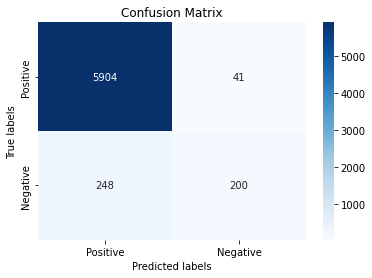

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
ax= plt.subplot()#annot=True to annotate cells
sns.heatmap(cf_matrix, annot=True, ax = ax,cmap='Blues',fmt='');# labels, title and ticks
ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Positive', 'Negative']); ax.yaxis.set_ticklabels(['Positive', 'Negative']);